# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [56]:
#add libraries used
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

We will be trying to answer the below questoins:
Propability of missing the appointment according to sex,scholarship, alcoholism, diabetes, Neighbourhood, day of week and age

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#upload the files and read them
nosh =pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [3]:
#Checking data
nosh.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [103]:
#check for stat info
nosh.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

from the above we see some illogical ages (negative) that must be removed

In [5]:
#remove -1 age as its not logic
nosh = nosh[nosh.Age != -1]

The dates fileds need to be formated properly 

In [102]:
#change dates fromat into datetime so we can use it later in the analysis
nosh['ScheduledDay']= pd.to_datetime(nosh['ScheduledDay'])
nosh['AppointmentDay']= pd.to_datetime(nosh['AppointmentDay'])
 
# Check the format of 'Date' column and also check for blanks to be handled 
nosh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [100]:
#remove duplicated using AppointmentID field, we cant use the patientId since same patient can take several appointments
nosh = nosh.drop_duplicates(subset=['AppointmentID'], keep='first')

<a id='eda'></a>
## Exploratory Data Analysis

### Propability of missing the appointment according to sex

In [7]:
#creating df for no shows
nos=nosh[((nosh['No-show'] != "No"))]

First thing lets check the %of each sex and then see if it is changed when they missed their appointment or not


In [93]:
#check the number of each gender
noshs=nosh.groupby('Gender').Age.count().reset_index(name='counts')
noshs

,Gender,counts
0,Female,71839
1,Male,38687


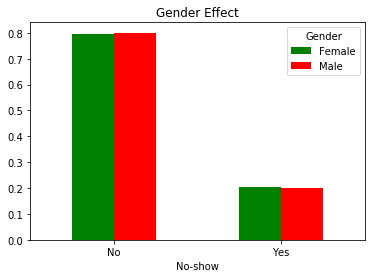

In [135]:
#change to catigorical
nosh.Gender.replace({'F':"Female",'M':"Male"},inplace = True )
#get pool by gender using unstack
gend = nosh.groupby(['Gender','No-show']).size().unstack('Gender').apply(lambda x:x/x.sum()).plot.bar(title='Gender Effect',tick_label='percent',rot=0,color =["green","red"]);

from the above we can see that there is huge varriances based on Gender of patient

In [111]:
#create group bar plot function to be used with different variables
def groupbar(df,xVar):
    #used to group the data of the df by the variable and plot it on bar chart
    df.groupby(xVar).size().plot.bar(rot=0, color =["green","red"])
    plt.title(f'Distibution of {xVar} in the No-Show'.title())
    plt.ylabel(xVar.title())
    plt.ylabel('Frequency')          
    plt.show()
        

### Propability of missing the appointment according to Diabetes

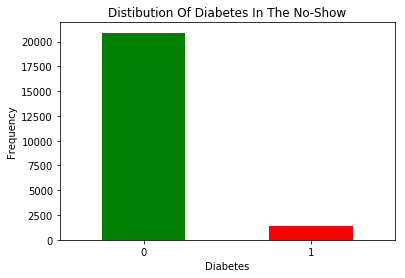

In [112]:
groupbar (nos,'Diabetes')

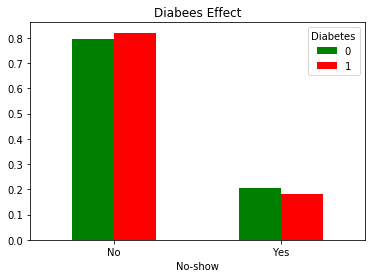

In [122]:
dia = nosh.groupby(['Diabetes','No-show']).size().unstack('Diabetes').apply(lambda x:x/x.sum()).plot.bar(title='Diabees Effect',rot=0, color =["green","red"]);

patients with diabetes have slightly more propabilty to be on their appointments compared to those who are healty

### Propability of missing the appointment according to Scholarship

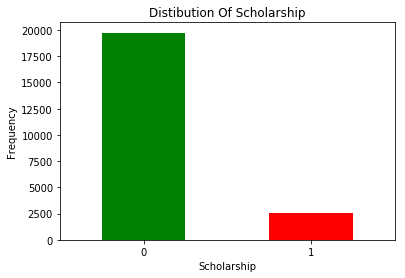

In [90]:
groupbar (nos,'Scholarship')

Those without scholarships are more in missing appointments

In [92]:
### Propability of missing the appointment according to Alcholism

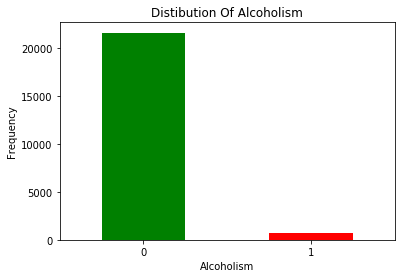

In [94]:
groupbar (nos,'Alcoholism')

Those who don't suffer alcoholism are more in missing appointments

### Propability of missing the appointment according to SMS_received

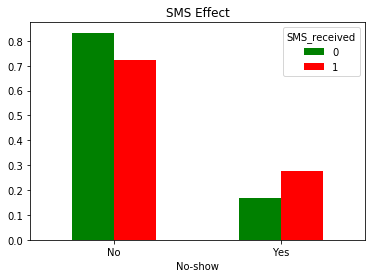

In [124]:
#get pool by sms using unstack
gend = nosh.groupby(['SMS_received','No-show']).size().unstack('SMS_received').apply(lambda x:x/x.sum()).plot.bar(title='SMS Effect',rot=0, color =["green","red"]);

those who got SMS and didn't show up are more than those who didn't

### The highest miss app by Neighbourhood

In [12]:
#Find most probablity to miss app by Neighbourhood
selectedCategories = 15
mostFrequentLocations  = list(nos['Neighbourhood'].value_counts()[:selectedCategories].index)
top = nos['Neighbourhood'].value_counts()
top = top[:15].reset_index(name='counts')
top

,index,counts
0,JARDIM CAMBURI,1465
1,MARIA ORTIZ,1219
2,ITARARÉ,923
3,RESISTÊNCIA,906
4,CENTRO,703
5,JESUS DE NAZARETH,696
6,JARDIM DA PENHA,631
7,CARATOÍRA,591
8,TABUAZEIRO,573
9,BONFIM,550


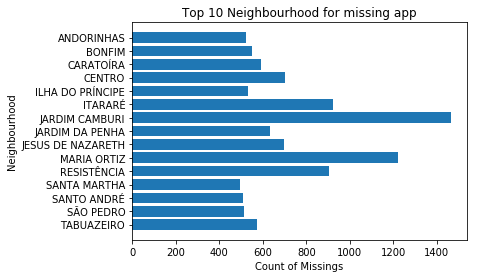

In [13]:
#plot top Neighbourhoods
plt.barh(top['index'],top['counts'])
plt.title('Top 10 Neighbourhood for missing app')
plt.ylabel('Neighbourhood')
plt.xlabel('Count of Missings')
plt.gca().invert_yaxis()
plt.show();

The top 5 Neighborhoods for missing appointments are JARDIM CAMBURI	1465, MARIA ORTIZ	1219,ITARARÉ	923, RESISTÊNCIA	906, CENTRO	703

### The highest miss app by day of week

In [14]:
#add new col for days
nos['day']= pd.to_datetime(nos['AppointmentDay']).dt.day_name()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
#create df with days and their count
day=nos.groupby('day').day.count().reset_index(name='counts').sort_values(by='counts')
day

,day,counts
2,Saturday,9
3,Thursday,3338
0,Friday,4037
1,Monday,4690
5,Wednesday,5093
4,Tuesday,5152


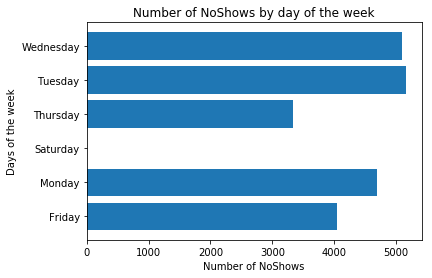

In [16]:
#plot days
x = day['day']
y = day['counts']
plt.barh(x, y) 
plt.ylabel('Days of the week')
plt.xlabel('Number of NoShows')
plt.title('Number of NoShows by day of the week')
plt.show()


Most day of week with missed app is Tuesday followed by Wednesday

### The highest miss app by Age

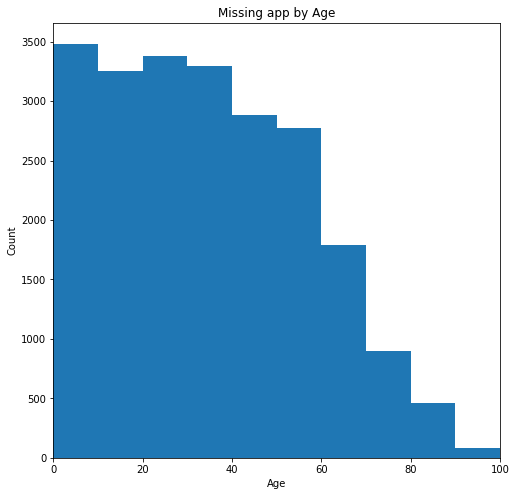

In [17]:
#plot durations
bins=np.arange(0, nos['Age'].max(), 10)
plt.figure(figsize=[8, 8])
plt.hist(data = nos, x = 'Age',bins=bins)
plt.xlim(0,100)
plt.title('Missing app by Age')
plt.ylabel('Count');
plt.xlabel('Age');

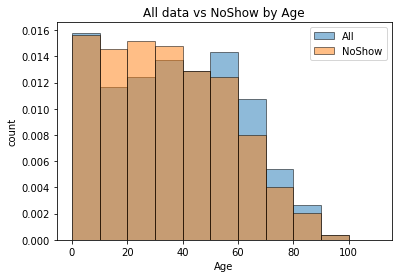

In [143]:
#create Plot for No show by age bins
plt.hist(data = nosh,bins=bins, x='Age', alpha=0.5, label='All',density=True,edgecolor='black')
plt.hist(data= nos, x='Age' ,bins=bins, alpha=0.5, label='NoShow',density=True,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.title('All data vs NoShow by Age')

plt.legend(loc='upper right')
plt.show()

Highest miss by age is for 0-10 years bracket but its accpetable since when compared to all data provided we can notice that this is also the highest pool provided

<a id='conclusions'></a>
## Conclusions

#### Using the data provided we are able to note the following regarding the No show for appointments:

1.Most missed according to gender are females

2.The top 5 Neighborhoods for missing appointments are JARDIM CAMBURI	1465, MARIA ORTIZ	1219,ITARARÉ	923, RESISTÊNCIA	906, CENTRO	703

3.Most day of week with missed app is Tuesday followed by Wednesday 

4.Highest miss by age is for 0-10 years bracket but its accpetable since when compared to all data provided we can notice that this is also the highest pool provided


Limitations:
The data accuracy need to be check for some fileds like age where we found -ve ages, many 0 which needs more explaination if its really new borns or just typos and also some very old ages that need confirmations
Using another sample of data to confirm the above findings
More digging for the reason on not reciveing the SMS, is it wrong phone number or problem with sms tool from our side or other
Mapping Neighbourhoods' location compared to the hospital would give more info about relation between distance and missing appointments

Help needed:
    I need to know how to add lable on the bar in the charts for gender/NoShow.
    df.groupby('Gender',xVar).size().plot.bar(rot=0, color =["green","red"]) didn't work with 2 group by.

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0